In [1]:
using ISPC

Linker: /usr/bin/libtool


In [2]:
@inline function mandel(c_re, c_im, count)
    z_re = c_re
    z_im = c_im
    i = 0
    while i < count
        if (z_re * z_re + z_im * z_im > 4.0f0)
            break
        end
        new_re = z_re*z_re - z_im*z_im
        new_im = 2.0f0 * z_re * z_im
        z_re = c_re + new_re
        z_im = c_im + new_im
        i += 1
    end
    return i
end

mandel (generic function with 1 method)

In [3]:
@ispc function mandelbrot_ispc(x0, y0, x1, y1, output, max_iters)
    height, width = size(output)
    dx = (x1 - x0) / width
    dy = (y1 - y0) / height
    @kernel(`--target=avx1-i32x16`) do
        i = 0
        while i < width
            @foreach(0:height-1) do j
                x = x0 + i * dx
                y = y0 + j * dy
                output[j, i] = mandel(x, y, max_iters)
            end
            i += 1
        end
    end
    output
end

Extracted fragment Val{symbol("##7462")}
Arguments: Any[:x0,:y0,:output,:max_iters,:height,:width,:dx,:dy]
Body: begin 
    i = 0
    unless ((top(getfield))(Base.FastMath,:lt_fast))(i,width) goto 1
    2: 
    $(Expr(:meta, :ispc, symbol("##foreach#7470"), :foreach, (:(0:Base.FastMath.sub_fast(height,1)),)))
    j = (ISPC.foreachindex)(1,(Main.colon)(0,((top(getfield))(Base.FastMath,:sub_fast))(height,1)))
    x = ((top(getfield))(Base.FastMath,:add_fast))(x0,((top(getfield))(Base.FastMath,:mul_fast))(i,dx))
    y = ((top(getfield))(Base.FastMath,:add_fast))(y0,((top(getfield))(Base.FastMath,:mul_fast))(j,dy))
    GenSym(3) = (Main.mandel)(x,y,max_iters)
    (Main.setindex!)(output,GenSym(3),j,i)
    $(Expr(:meta, :ispc, symbol("##foreach#7470")))
    i = ((top(getfield))(Base.FastMath,:add_fast))(i,1)
    3: 
    unless (top(!))(((top(getfield))(Base.FastMath,:lt_fast))(i,width)) goto 2
    1: 
    0: 
    return
end


mandelbrot_ispc (generic function with 1 method)

In [4]:
output = zeros(Float32, 768, 1024);

In [5]:
@code_lowered mandelbrot_ispc(-2.0f0, -1.0f0, 1.0f0, 1.0f0, output, 256)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:x0,:y0,:x1,:y1,:output,:max_iters], Any[Any[Any[:x0,:Any,1],Any[:y0,:Any,1],Any[:x1,:Any,0],Any[:y1,:Any,0],Any[:output,:Any,1],Any[:max_iters,:Any,1],Any[:height,:Any,19],Any[:width,:Any,19],Any[symbol("#s41"),:Any,2],Any[:dx,:Any,19],Any[:dy,:Any,19]],Any[],4,Any[]], :(begin  # In[3], line 2:
        NewvarNode(:height)
        NewvarNode(:width)
        NewvarNode(:dx)
        NewvarNode(:dy)
        GenSym(0) = (Main.size)(output)
        #s41 = (top(start))(GenSym(0))
        GenSym(1) = (top(indexed_next))(GenSym(0),1,#s41)
        height = (top(getfield))(GenSym(1),1)
        #s41 = (top(getfield))(GenSym(1),2)
        GenSym(2) = (top(indexed_next))(GenSym(0),2,#s41)
        width = (top(getfield))(GenSym(2),1)
        #s41 = (top(getfield))(GenSym(2),2) # In[3], line 3:
        dx = (x1 - x0) / width # In[3], line 4:
        dy = (y1 - y0) / height # In[3], line 5: # /Users/plantagenet/.julia/v0.4/ISPC.jl/src/macros.jl, line 117:

In [6]:
@time out = mandelbrot_ispc(-2.0f0, -1.0f0, 1.0f0, 1.0f0, output, 256);

Generating fragment ##7462 for argument types (Float32,Float32,Array{Float32,2},Int64,Int64,Int64,Float32,Float32)
Compile options: `--target=avx1-i32x16`
Running type inference...
Lambda function:
	 arguments: Any[:x0,:y0,:output,:max_iters,:height,:width,:dx,:dy]
	 local variables: 
		(:i,Int64,2)
		(:j,Int64,18)
		(:x,Float32,18)
		(:y,Float32,18)
		(:x0,Float32,0)
		(:y0,Float32,0)
		(:output,Array{Float32,2},0)
		(:max_iters,Int64,0)
		(:height,Int64,18)
		(:width,Int64,18)
		(:dx,Float32,18)
		(:dy,Float32,18)
		(symbol("##ys#7777"),Tuple{Int64},0)
		(symbol("##ys#7778"),Tuple{Int64},0)
		(symbol("##zs#7779"),Tuple{},0)
		(symbol("##zs#7780"),Tuple{},0)
		(symbol("##z_re#7781"),Float32,2)
		(symbol("##z_im#7782"),Float32,2)
		(symbol("##i#7783"),Int64,2)
		(symbol("##new_re#7784"),Float32,18)
		(symbol("##new_im#7785"),Float32,18)
		(symbol("####xs#7776#7786"),Tuple{},0)
		(symbol("##I#7787"),Tuple{},0)
		(symbol("##ys#7788"),Tuple{Int64},0)
		(symbol("##ys#7789"),Tuple{Int64},0)

ld: warning: -macosx_version_min not specified, assuming 10.10


  5.945489 seconds (3.87 M allocations: 186.864 MB, 0.83% gc time)


In [45]:
x0, x1 = -2.0f0, 1.0f0
y0, y1 = -1.0f0, 1.0f0

(-1.0f0,1.0f0)

In [66]:
@time out = mandelbrot_ispc(x0, y0, x1, y1, output, 256);

  0.097896 seconds (15 allocations: 352 bytes)


In [67]:
using PyPlot

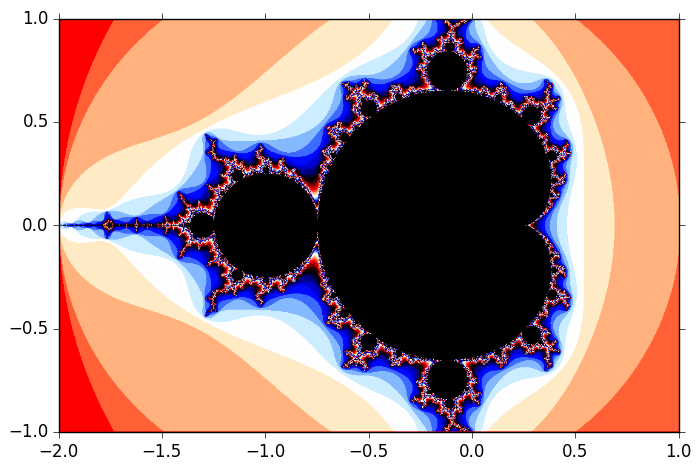

In [68]:
imshow(out, cmap="flag", aspect="equal", extent=(x0, x1, y0, y1))
display(gcf())
close()

In [11]:
func = ISPC.ispc_funcs[end];

In [12]:
println(func.ispc_code)

export void ispc_func_1(uniform float x0, uniform float y0, uniform float output[], uniform int64 output__len__1, uniform int64 output__len__2, uniform int64 max_iters, uniform int64 height, uniform int64 width, uniform float dx, uniform float dy) {
    uniform int64 i = 0;
    while((i < width)) {
        foreach(j = 0 ... (height - 1)) {
             int64 _gensym4 = (height - 1);
             float x = (x0 + (((float)i) * dx));
             float y = (y0 + (((float)j) * dy));
             float __z_re_7781 = x;
             float __z_im_7782 = y;
             int64 __i_7783 = 0;
            
            
            while((__i_7783 < max_iters)) {
                if ((0x1p+2 < ((__z_re_7781 * __z_re_7781) + (__z_im_7782 * __z_im_7782)))) {
                    break;
                } else {
                     float __new_re_7784 = ((__z_re_7781 * __z_re_7781) - (__z_im_7782 * __z_im_7782));
                     float __new_im_7785 = ((0x1p+1 * __z_re_7781) * __z_im_7782);
        

In [13]:
ISPC.ispc_native(func.ispc_code, func.ispc_opts)

	.section	__TEXT,__text,regular,pure_instructions
	.macosx_version_min 13, 4
	.section	__TEXT,__literal16,16byte_literals
	.align	4
LCPI0_0:
	.long	0                       ## 0x0
	.long	1                       ## 0x1
	.long	2                       ## 0x2
	.long	3                       ## 0x3
LCPI0_1:
	.long	4                       ## 0x4
	.long	5                       ## 0x5
	.long	6                       ## 0x6
	.long	7                       ## 0x7
LCPI0_2:
	.long	8                       ## 0x8
	.long	9                       ## 0x9
	.long	10                      ## 0xa
	.long	11                      ## 0xb
LCPI0_3:
	.long	12                      ## 0xc
	.long	13                      ## 0xd
	.long	14                      ## 0xe
	.long	15                      ## 0xf
LCPI0_4:
	.byte	0                       ## 0x0
	.byte	1                       ## 0x1
	.byte	4                       ## 0x4
	.byte	5                       ## 0x5
	.byte	8                       ## 0x8
	.byte	9                 

1340

 %xmm2, %ymm1, %ymm3
	vpaddd	LCPI0_2(%rip), %xmm0, %xmm4
	vpaddd	LCPI0_3(%rip), %xmm0, %xmm0
	vinsertf128	$1, %xmm0, %ymm4, %ymm5
	vmovups	-32(%rsp), %ymm7        ## 32-byte Reload
	vextractf128	$1, %ymm7, %xmm6
	vpcmpgtd	%xmm0, %xmm6, %xmm0
	vpcmpgtd	%xmm4, %xmm7, %xmm4
	vinsertf128	$1, %xmm0, %ymm4, %ymm4
	vmovups	%ymm4, 32(%rsp)         ## 32-byte Spill
	vpcmpgtd	%xmm2, %xmm6, %xmm0
	vpcmpgtd	%xmm1, %xmm7, %xmm1
	vinsertf128	$1, %xmm0, %ymm1, %ymm12
	vmovups	%ymm12, (%rsp)          ## 32-byte Spill
	vxorps	%xmm0, %xmm0, %xmm0
	vcvtsi2ssq	%r8, %xmm0, %xmm0
	vmulss	156(%rsp), %xmm0, %xmm0 ## 4-byte Folded Reload
	vaddss	152(%rsp), %xmm0, %xmm0 ## 4-byte Folded Reload
	vpermilps	$0, %xmm0, %xmm0 ## xmm0 = xmm0[0,0,0,0]
	vinsertf128	$1, %xmm0, %ymm0, %ymm6
	vmovups	%ymm6, 256(%rsp)        ## 32-byte Spill
	vcvtdq2ps	%ymm5, %ymm0
	vcvtdq2ps	%ymm3, %ymm1
	vmovups	192(%rsp), %ymm2        ## 32-byte Reload
	vmulps	%ymm1, %ymm2, %ymm1
	vmulps	%ymm0, %ymm2, %ymm0
	vmovups	224(%rsp), %ymm2    

In [14]:
ISPC.ispc_llvm(func.ispc_code, func.ispc_opts)

; ModuleID = '<stdin>'
target datalayout = "e-m:o-i64:64-f80:128-n8:16:32:64-S128"
target triple = "x86_64-apple-darwin13.4.0"

; Function Attrs: nounwind readnone
declare i32 @llvm.x86.avx.movmsk.ps.256(<8 x float>) #0

; Function Attrs: nounwind
declare void @llvm.x86.avx.maskstore.ps.256(i8*, <8 x float>, <8 x float>) #1

; Function Attrs: nounwind readnone
declare <8 x float> @llvm.x86.avx.blendv.ps.256(<8 x float>, <8 x float>, <8 x float>) #0

; Function Attrs: nounwind readnone
declare <4 x double> @llvm.x86.avx.blendv.pd.256(<4 x double>, <4 x double>, <4 x double>) #0

; Function Attrs: nounwind
define void @ispc_func_1___unfunfun_3C_unf_3E_unIunIunIunIunIunfunf(float %x0, float %y0, float* noalias nocapture %output, i64 %output__len__1, i64 %output__len__2, i64 %max_iters, i64 %height, i64 %width, float %dx, float %dy, <16 x i32> %__mask) #1 {
allocas:
  %less_i_load_width_load402 = icmp sgt i64 %width, 0
  br i1 %less_i_load_width_load402, label %for_loop.lr.ph, label %for_e

1340

32 11, i32 12, i32 13, i32 14, i32 15>
  %blend0.i.i334 = call <8 x float> @llvm.x86.avx.blendv.ps.256(<8 x float> %old0.i.i328, <8 x float> %new0.i.i330, <8 x float> %mask0.i269) #1
  %blend1.i.i335 = call <8 x float> @llvm.x86.avx.blendv.ps.256(<8 x float> %old1.i.i329, <8 x float> %new1.i.i331, <8 x float> %mask1.i271) #1
  %blend.i.i336 = shufflevector <8 x float> %blend0.i.i334, <8 x float> %blend1.i.i335, <16 x i32> <i32 0, i32 1, i32 2, i32 3, i32 4, i32 5, i32 6, i32 7, i32 8, i32 9, i32 10, i32 11, i32 12, i32 13, i32 14, i32 15>
  %add___i_7783_load196_ = add <16 x i64> %3, <i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1, i64 1>
  %old0d.i = shufflevector <16 x double> %.ph394, <16 x double> undef, <4 x i32> <i32 0, i32 1, i32 2, i32 3>
  %old1d.i = shufflevector <16 x double> %.ph394, <16 x double> undef, <4 x i32> <i32 4, i32 5, i32 6, i32 7>
  %old2d.i = shufflevector <16 x double> %.ph394, <16 x double> undef, <4 x 